## 数据采集 demo

In [1]:
#url编码, URL 只能使用 ASCII 字符集. 来通过因特网进行发送
import urllib
print('编码：',urllib.parse.quote("美食海报"))
print( '解码：',urllib.parse.unquote('%E7%BE%8E%E9%A3%9F%E6%B5%B7%E6%8A%A5', encoding='utf-8', errors='replace'))

编码： %E7%BE%8E%E9%A3%9F%E6%B5%B7%E6%8A%A5
解码： 美食海报


In [3]:
#最小demo  #无头浏览器

import asyncio # 
from pyppeteer import launch
import urllib

topic="美食海报"

url='https://cn.bing.com/images/search?q='+urllib.parse.quote(topic)

#异步、同步
async def main():
    #浏览器打开，默认是无头浏览器
    browser = await launch()
    #新开tab
    page = await browser.newPage()
    #跳转至新的url
    await page.goto(url)
    
    #截图,    {'键名':'键值'}
    await page.screenshot({
        'path': 'test---0000001.jpg'
    })
    
    #关闭浏览器
    await browser.close()
    
#jupyter 已经运行了loop，无需自己激活
#asyncio.get_event_loop().run_until_complete(main())

await main()

In [10]:
# 待下载的图片url
images={}

In [8]:
#字符串
hot="今天天气"
print(hot)

hot='你好'
print(hot)

hot='''你好
哈哈哈哈
填完
'''
print(hot)

今天天气
你好
你好
哈哈哈哈
填完



In [11]:
from pyppeteer import launch

url='https://cn.bing.com/images/search?q=%E7%BE%8E%E9%A3%9F%E6%B5%B7%E6%8A%A5'

#试试修改headless
browser = await launch(headless=True)
page = await browser.newPage()
await page.goto(url)

#页面等待时间,ms, 
await page.waitFor(2500)

#注入js代码，获取页面里所有图片url
#配合chrome的console演示
async def get_imgs(page):
    imgs = await page.evaluate('''() => {
            return Array.from(document.images,img=>{
                    if(img.alt.match('美食')&&img.src.match('https://')){
                        return img.src;
                    }
                }).filter(img=>{return !!img});
        }''')
    return imgs

#当图片数量大于 100的时候，停止
while len(images)<100:
    imgs=await get_imgs(page)
    #python 列表，javscript 数组
    # ["http://www","xxxx","xxxx"]
    for img in imgs:
        #字典，如何赋值
        images[img]=1
        
    await page.evaluate('''() => {
            return window.scrollTo(100,document.body.scrollHeight);
        }''')
    print(len(images))
    await page.waitFor(2500)
    
    
#关闭浏览器
await browser.close()

25
52
79
106


In [12]:
list(images.keys())

['https://tse3-mm.cn.bing.net/th/id/OIP.VwW5eQfOYJBZQJnZ9Bb_XAHaKe?w=172&h=243&c=7&o=5&pid=1.7',
 'https://tse3-mm.cn.bing.net/th/id/OIP.ai7GO6PhScq3RRdfm1NLNAHaLG?w=172&h=258&c=7&o=5&pid=1.7',
 'https://tse4-mm.cn.bing.net/th/id/OIP.co-GQvlrHZR4dBrCOk80CgHaJ4?w=172&h=229&c=7&o=5&pid=1.7',
 'https://tse2-mm.cn.bing.net/th/id/OIP.wI0lCdoxLa8gh3-Mk2cTLgHaMW?w=172&h=287&c=7&o=5&pid=1.7',
 'https://tse2-mm.cn.bing.net/th/id/OIP.56NO_hV1HsMki91xuZJ0-gHaLG?w=172&h=258&c=7&o=5&pid=1.7',
 'https://tse3-mm.cn.bing.net/th/id/OIP.nSuBRMK6WTp9yOBkbbYvLgHaJv?w=172&h=226&c=7&o=5&pid=1.7',
 'https://tse2-mm.cn.bing.net/th/id/OIP.xT38PF7jXQsrmW6pGA4wtAHaIy?w=172&h=204&c=7&o=5&pid=1.7',
 'https://tse2-mm.cn.bing.net/th/id/OIP.Nv40alTPP6qjdVwTr0hrqAHaKX?w=172&h=240&c=7&o=5&pid=1.7',
 'https://tse4-mm.cn.bing.net/th/id/OIP.-aeEcgQVXwPYsMoSNuwJpgHaIo?w=172&h=200&c=7&o=5&pid=1.7',
 'https://tse3-mm.cn.bing.net/th/id/OIP.1VHW89-DoAyN4rJuLzCAugHaKX?w=172&h=240&c=7&o=5&pid=1.7',
 'https://tse2-mm.cn.bing.net/

In [105]:
#根据url下载图片至本地,路径？
import requests
def download_img(img_url,file_path='test.png'):
    print (img_url)
    r = requests.get(img_url, stream=True)
    print(r.status_code) # 返回状态码
    if r.status_code == 200:
        open(file_path, 'wb').write(r.content) # 将内容写入图片
        print("done")
    del r
#download_img(list(images.keys())[0])

In [106]:
#全部下载保存,# enumerate
for i,img in enumerate(images.keys()):
    #print(i)
    download_img(img,"img/img_"+str(i)+".png")

https://tse3-mm.cn.bing.net/th/id/OIP.VwW5eQfOYJBZQJnZ9Bb_XAHaKe?w=172&h=243&c=7&o=5&pid=1.7
200
done
https://tse3-mm.cn.bing.net/th/id/OIP.ai7GO6PhScq3RRdfm1NLNAHaLG?w=172&h=258&c=7&o=5&pid=1.7
200
done
https://tse4-mm.cn.bing.net/th/id/OIP.co-GQvlrHZR4dBrCOk80CgHaJ4?w=172&h=229&c=7&o=5&pid=1.7
200
done
https://tse2-mm.cn.bing.net/th/id/OIP.wI0lCdoxLa8gh3-Mk2cTLgHaMW?w=172&h=287&c=7&o=5&pid=1.7
200
done
https://tse2-mm.cn.bing.net/th/id/OIP.56NO_hV1HsMki91xuZJ0-gHaLG?w=172&h=258&c=7&o=5&pid=1.7
200
done
https://tse3-mm.cn.bing.net/th/id/OIP.nSuBRMK6WTp9yOBkbbYvLgHaJv?w=172&h=226&c=7&o=5&pid=1.7
200
done
https://tse2-mm.cn.bing.net/th/id/OIP.xT38PF7jXQsrmW6pGA4wtAHaIy?w=172&h=204&c=7&o=5&pid=1.7
200
done
https://tse2-mm.cn.bing.net/th/id/OIP.Nv40alTPP6qjdVwTr0hrqAHaKX?w=172&h=240&c=7&o=5&pid=1.7
200
done
https://tse4-mm.cn.bing.net/th/id/OIP.-aeEcgQVXwPYsMoSNuwJpgHaIo?w=172&h=200&c=7&o=5&pid=1.7
200
done
https://tse3-mm.cn.bing.net/th/id/OIP.1VHW89-DoAyN4rJuLzCAugHaKX?w=172&h=240&c=7&o

200
done
https://tse2-mm.cn.bing.net/th/id/OIP.VtxmtLWiT2pZEOuL0C9jZwHaHs?w=172&h=178&c=7&o=5&pid=1.7
200
done
https://tse4-mm.cn.bing.net/th/id/OIP.3KWffq4qWGLLhvbDVx-tfgHaKh?w=172&h=244&c=7&o=5&pid=1.7
200
done
https://tse1-mm.cn.bing.net/th/id/OIP.dy2BaLkRuLoFrS_thFoIBwHaLG?w=172&h=258&c=7&o=5&pid=1.7
200
done
https://tse2-mm.cn.bing.net/th/id/OIP.9IIvXJOBaCSuy5G02NLRYwHaLE?w=172&h=258&c=7&o=5&pid=1.7
200
done
https://tse2-mm.cn.bing.net/th/id/OIP.AY0tQpstxY3qqs7Eh4Bb4AHaHx?w=172&h=181&c=7&o=5&pid=1.7
200
done
https://tse2-mm.cn.bing.net/th/id/OIP.CWSAYWW7DbwMrP-EUsY5gwHaL4?w=172&h=276&c=7&o=5&pid=1.7
200
done
https://tse1-mm.cn.bing.net/th/id/OIP.PTXC8jbGzobyBEixyxRZfwHaHI?w=172&h=166&c=7&o=5&pid=1.7
200
done
https://tse3-mm.cn.bing.net/th/id/OIP.zJfBmvyCpbBtNSktVSSYiAHaK0?w=172&h=251&c=7&o=5&pid=1.7
200
done
https://tse4-mm.cn.bing.net/th/id/OIP.i0_pORCNTq5wMnGujXhz1gHaG7?w=172&h=161&c=7&o=5&pid=1.7
200
done
https://tse4-mm.cn.bing.net/th/id/OIP.5vVzWTRpeaAuHw4Lc993RgHaKW?w=172&h=

## 数据处理

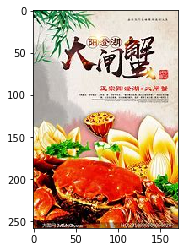

In [64]:
# 读取图片，并预览
# 注释
# opencv 
import cv2

import numpy as np
from matplotlib import pyplot as plt

#opencv读取图片，默认是 BGR ,不是rgb
img=cv2.imread('img/img_94.png',cv2.IMREAD_COLOR)
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [43]:
img.shape

(258, 172, 3)

In [65]:
'''
HSV颜色空间规定:H范围0~360,S范围0~1,V范围0~1 

PS中的HSV范围，H是0-360，S是0-1，V（B）是0-1

opencv中的HSV范围，H是0-180，S是0-255，V是0-255

'''

# h:0-360 , s:0-255, v:0-255
# r:0-255, g:0-255, b:0-255
def rgb_to_hsv(rgb=[]):
    img=np.array([[rgb]],np.uint8)
    #print(img)
    #print(img)
    plt.imshow(img)
    plt.show()
    img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    img_hsv[0][0]*=2
    #print(img_hsv)
    return img_hsv


def hsv_to_rgb(hsv=[]):
    hsv[0]/=2
    img_hsv=np.array([[hsv]],np.uint8)
    img_rgb = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB)
    plt.imshow(img_rgb)
    plt.show()
    return img_rgb

#rgb_to_hsv([250,0,0])
#hsv_to_rgb([360,255,255])


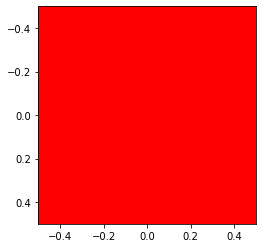

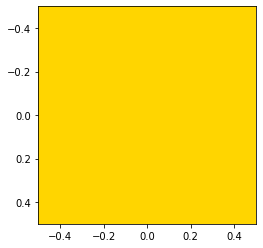

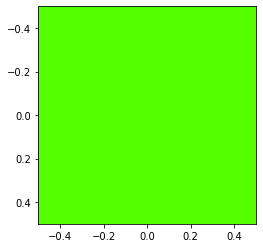

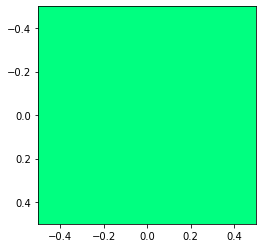

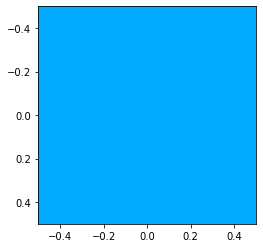

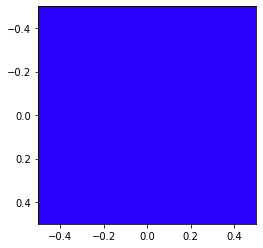

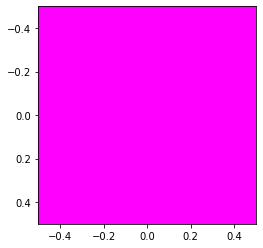

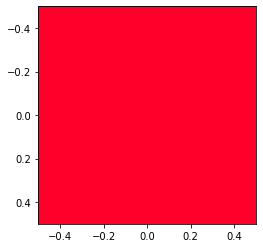

In [66]:
# 颜色分类，简化版
target_colors=[]
for i in range(0,360,50):
    target_colors.append([i,255,255])
    hsv_to_rgb([i,255,255])

In [22]:
img.size/3

44376.0

[1 1 1 0 0 0]

[[4.         1.66666667 2.        ]
 [1.         2.         2.        ]]


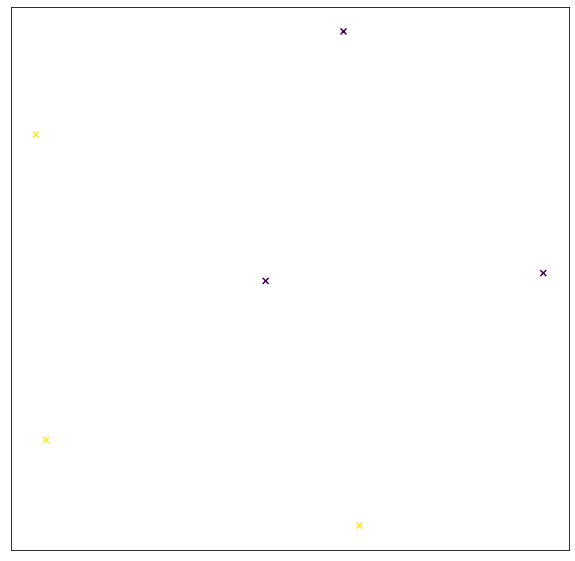

In [67]:
# k-means聚类 demo
from sklearn.cluster import KMeans

X = np.array([[1,2, 2], [1,2,4], [1,2,0],[4,2,2], [4,2,4], [4,1, 0]])


model = KMeans(n_clusters=2).fit(X)


print(model.labels_) 
print()
print(model.cluster_centers_) 






# 可视化查看模型学习到的分类
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# TSNE
tsne = TSNE(n_components=2)
decomposition_data = tsne.fit_transform(X)

x = []
y = []
 
for i in decomposition_data:
    x.append(i[0])
    y.append(i[1])
    
plt.figure(figsize=(10, 10)) 
ax = plt.axes() 
plt.scatter(x, y, c=model.labels_, marker="x") 
plt.xticks(()) 
plt.yticks(()) 
plt.show()

In [68]:
#一张图片里的像素聚类
from sklearn.cluster import KMeans
def img_model(img):
    img=cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    X = np.array(img.reshape(img.shape[0]*img.shape[1],3))
    model = KMeans(n_clusters=3).fit(X)
    return model 
model=img_model(img)

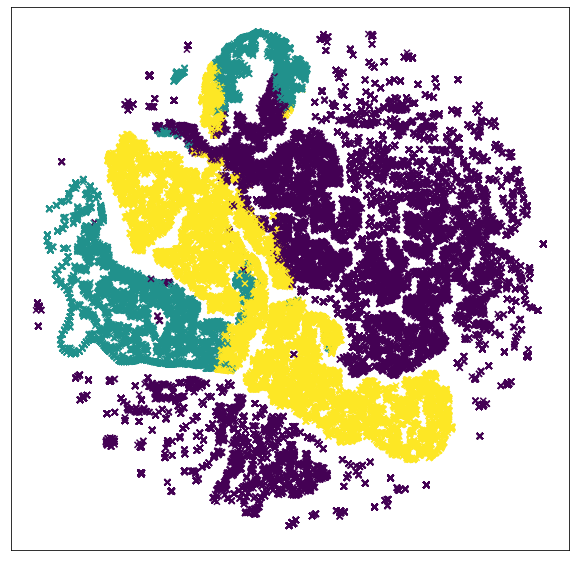

In [72]:
#查看下分布情况
# plt.scatter(X[:, 0], X[:, 1], c=model.labels_, cmap='viridis')
# centers = model.cluster_centers_
# plt.scatter(centers[:, 0], centers[:, 1], c='k', s=200, alpha=0.5)

#课堂演示报错的原因是 X输入不对，漏了这一句
X = np.array(img.reshape(img.shape[0]*img.shape[1],3))

tsne = TSNE(n_components=2)
decomposition_data = tsne.fit_transform(X)

x = []
y = []
 
for i in decomposition_data:
    x.append(i[0])
    y.append(i[1])
    
plt.figure(figsize=(10, 10)) 
ax = plt.axes() 

#待解决
plt.scatter(x, y, c=model.labels_, marker="x") 

plt.xticks(()) 
plt.yticks(()) 
plt.show()

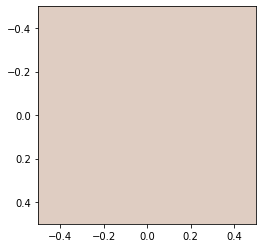

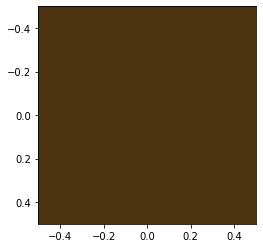

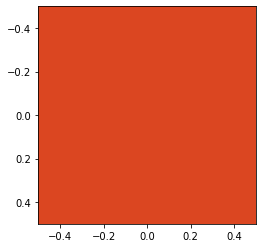

In [50]:
#查看下kmeans的 重心点

for c in model.cluster_centers_:
     hsv_to_rgb(c)


In [51]:
#使用scikit learn的余弦相似度计算方法 demo
from sklearn.metrics.pairwise import cosine_similarity
sim=cosine_similarity([[0,100,0],[3,3,2],[200,30,40]])
#查看下第1位与第3位相似度
sim[0][2]

0.1455213750217998

In [52]:
#从target_colors得到与color最近的颜色,用于分类颜色
def get_target_color(color):
    index=np.argmax(cosine_similarity([[color[0],255,255]]+target_colors)[0][1:-1])
    return target_colors[index]
get_target_color([10,23,22])

[0, 255, 255]

In [58]:
# 计算图片的配色方案
def get_image_color_scheme(model):
    color_scheme={}
    for c in model.cluster_centers_:
        #hsv_to_rgb(c)
        s=target_colors.index(get_target_color(c))
        print(s)
        if not s in color_scheme:
            color_scheme[s]=0
        color_scheme[s]+=1
    return color_scheme
get_image_color_scheme(model)

0
0
0


{0: 3}

In [57]:
target_colors

[0, 255, 255]

## 发现规律

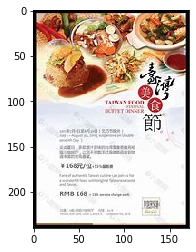

0
1
2
{0: 1, 1: 1, 2: 1}
[(0, 1), (0, 2), (1, 2)]
节点: [(0, {'value': 1}), (1, {'value': 1}), (2, {'value': 1})]
连线: [(0, 1, {'value': 1}), (0, 2, {'value': 1}), (1, 2, {'value': 1})]


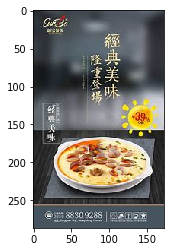

2
0
0
{2: 1, 0: 2}
[(2, 0)]
节点: [(0, {'value': 3}), (1, {'value': 1}), (2, {'value': 2})]
连线: [(0, 1, {'value': 1}), (0, 2, {'value': 2}), (1, 2, {'value': 1})]


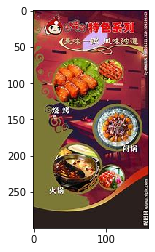

0
3
0
{0: 2, 3: 1}
[(0, 3)]
节点: [(0, {'value': 5}), (1, {'value': 1}), (2, {'value': 2}), (3, {'value': 1})]
连线: [(0, 1, {'value': 1}), (0, 2, {'value': 2}), (0, 3, {'value': 1}), (1, 2, {'value': 1})]


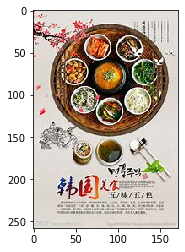

1
0
1
{1: 2, 0: 1}
[(1, 0)]
节点: [(0, {'value': 6}), (1, {'value': 3}), (2, {'value': 2}), (3, {'value': 1})]
连线: [(0, 1, {'value': 2}), (0, 2, {'value': 2}), (0, 3, {'value': 1}), (1, 2, {'value': 1})]


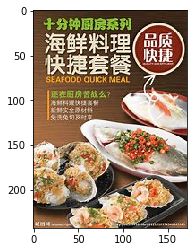

1
0
0
{1: 1, 0: 2}
[(1, 0)]
节点: [(0, {'value': 8}), (1, {'value': 4}), (2, {'value': 2}), (3, {'value': 1})]
连线: [(0, 1, {'value': 3}), (0, 2, {'value': 2}), (0, 3, {'value': 1}), (1, 2, {'value': 1})]


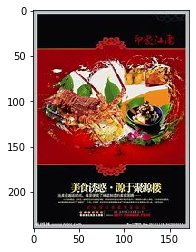

2
2
1
{2: 2, 1: 1}
[(2, 1)]
节点: [(0, {'value': 8}), (1, {'value': 5}), (2, {'value': 4}), (3, {'value': 1})]
连线: [(0, 1, {'value': 3}), (0, 2, {'value': 2}), (0, 3, {'value': 1}), (1, 2, {'value': 2})]


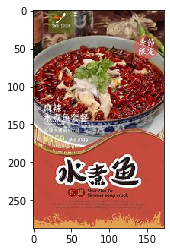

1
0
1
{1: 2, 0: 1}
[(1, 0)]
节点: [(0, {'value': 9}), (1, {'value': 7}), (2, {'value': 4}), (3, {'value': 1})]
连线: [(0, 1, {'value': 4}), (0, 2, {'value': 2}), (0, 3, {'value': 1}), (1, 2, {'value': 2})]


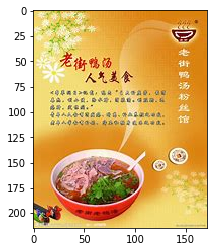

1
0
1
{1: 2, 0: 1}
[(1, 0)]
节点: [(0, {'value': 10}), (1, {'value': 9}), (2, {'value': 4}), (3, {'value': 1})]
连线: [(0, 1, {'value': 5}), (0, 2, {'value': 2}), (0, 3, {'value': 1}), (1, 2, {'value': 2})]


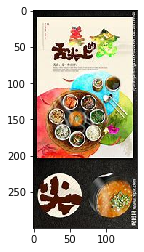

1
1
1
{1: 3}
[]
节点: [(0, {'value': 10}), (1, {'value': 12}), (2, {'value': 4}), (3, {'value': 1})]
连线: [(0, 1, {'value': 5}), (0, 2, {'value': 2}), (0, 3, {'value': 1}), (1, 2, {'value': 2})]


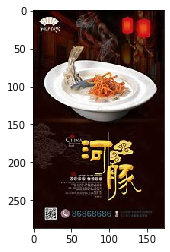

0
1
3
{0: 1, 1: 1, 3: 1}
[(0, 1), (0, 3), (1, 3)]
节点: [(0, {'value': 11}), (1, {'value': 13}), (2, {'value': 4}), (3, {'value': 2})]
连线: [(0, 1, {'value': 6}), (0, 2, {'value': 2}), (0, 3, {'value': 2}), (1, 2, {'value': 2}), (1, 3, {'value': 1})]


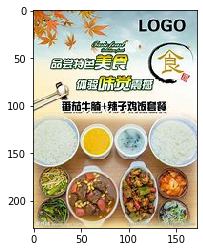

0
1
1
{0: 1, 1: 2}
[(0, 1)]
节点: [(0, {'value': 12}), (1, {'value': 15}), (2, {'value': 4}), (3, {'value': 2})]
连线: [(0, 1, {'value': 7}), (0, 2, {'value': 2}), (0, 3, {'value': 2}), (1, 2, {'value': 2}), (1, 3, {'value': 1})]


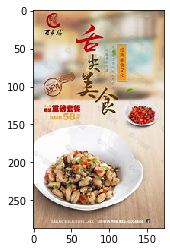

1
0
0
{1: 1, 0: 2}
[(1, 0)]
节点: [(0, {'value': 14}), (1, {'value': 16}), (2, {'value': 4}), (3, {'value': 2})]
连线: [(0, 1, {'value': 8}), (0, 2, {'value': 2}), (0, 3, {'value': 2}), (1, 2, {'value': 2}), (1, 3, {'value': 1})]


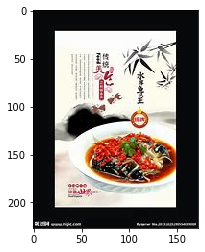

1
2
1
{1: 2, 2: 1}
[(1, 2)]
节点: [(0, {'value': 14}), (1, {'value': 18}), (2, {'value': 5}), (3, {'value': 2})]
连线: [(0, 1, {'value': 8}), (0, 2, {'value': 2}), (0, 3, {'value': 2}), (1, 2, {'value': 3}), (1, 3, {'value': 1})]


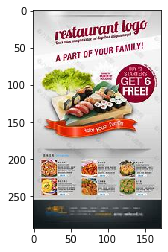

2
0
3
{2: 1, 0: 1, 3: 1}
[(2, 0), (2, 3), (0, 3)]
节点: [(0, {'value': 15}), (1, {'value': 18}), (2, {'value': 6}), (3, {'value': 3})]
连线: [(0, 1, {'value': 8}), (0, 2, {'value': 3}), (0, 3, {'value': 3}), (1, 2, {'value': 3}), (1, 3, {'value': 1}), (2, 3, {'value': 1})]


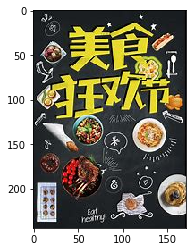

1
2
1
{1: 2, 2: 1}
[(1, 2)]
节点: [(0, {'value': 15}), (1, {'value': 20}), (2, {'value': 7}), (3, {'value': 3})]
连线: [(0, 1, {'value': 8}), (0, 2, {'value': 3}), (0, 3, {'value': 3}), (1, 2, {'value': 4}), (1, 3, {'value': 1}), (2, 3, {'value': 1})]


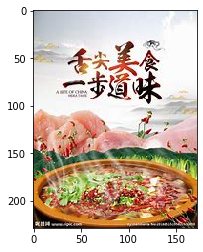

1
2
0
{1: 1, 2: 1, 0: 1}
[(1, 2), (1, 0), (2, 0)]
节点: [(0, {'value': 16}), (1, {'value': 21}), (2, {'value': 8}), (3, {'value': 3})]
连线: [(0, 1, {'value': 9}), (0, 2, {'value': 4}), (0, 3, {'value': 3}), (1, 2, {'value': 5}), (1, 3, {'value': 1}), (2, 3, {'value': 1})]


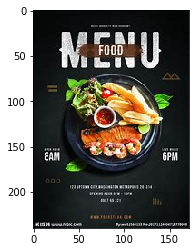

2
1
1
{2: 1, 1: 2}
[(2, 1)]
节点: [(0, {'value': 16}), (1, {'value': 23}), (2, {'value': 9}), (3, {'value': 3})]
连线: [(0, 1, {'value': 9}), (0, 2, {'value': 4}), (0, 3, {'value': 3}), (1, 2, {'value': 6}), (1, 3, {'value': 1}), (2, 3, {'value': 1})]


error: OpenCV(4.2.0) /Users/travis/build/skvark/opencv-python/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [61]:
import os,itertools 
# networkx 图算法 python库 
import networkx as nx

G = nx.Graph()

for root,dirs,files in os.walk('img'):
    for file in files:
        img=cv2.imread(root+"/"+file,cv2.IMREAD_COLOR)
        img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        plt.imshow(img)
        plt.show()
        
        model=img_model(img)
        
        color_scheme=get_image_color_scheme(model)
        
        print(color_scheme)
        
        # 更新节点
        for node,value in color_scheme.items():
            #节点的value属性表示颜色出现次数
            if G.has_node(node)==False:
                G.add_node(node, value=value)
            else:
                G.nodes[node]['value']+=value
        
        #更新 连线
        #两两组合
        links = list(itertools.combinations(color_scheme.keys(), 2))
        print(links)
        for link in links:
            #节点的连线
            if G.has_edge(link[0],link[1])==False:
                G.add_edge(link[0],link[1], value=1)
            else:
                G[link[0]][link[1]]['value']+=1
                
        print('节点:',G.nodes.data())
        print('连线:',G.edges.data())

In [62]:
print('节点:',G.nodes.data())
print('连线:',G.edges.data())

节点: [(0, {'value': 16}), (1, {'value': 23}), (2, {'value': 9}), (3, {'value': 3})]
连线: [(0, 1, {'value': 9}), (0, 2, {'value': 4}), (0, 3, {'value': 3}), (1, 2, {'value': 6}), (1, 3, {'value': 1}), (2, 3, {'value': 1})]


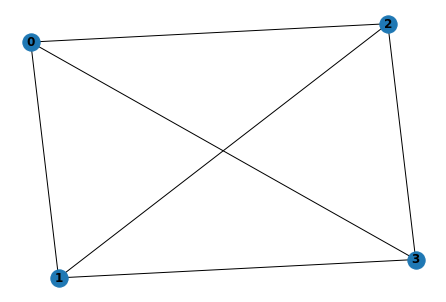

In [63]:
nx.draw(G, with_labels=True, font_weight='bold')

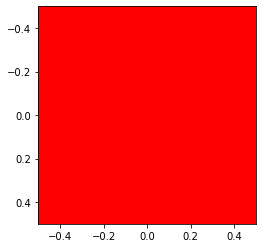

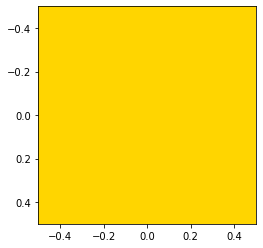

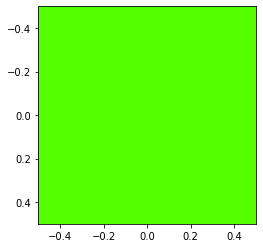

array([[[ 85, 255,   0]]], dtype=uint8)

In [165]:
hsv_to_rgb(target_colors[0])
hsv_to_rgb(target_colors[1])
hsv_to_rgb(target_colors[2])

In [154]:
G.nodes.data()

NodeDataView({0: {'value': 210}, 1: {'value': 89}, 2: {'value': 22}})

In [160]:
G.edges.data()

EdgeDataView([(0, 1, {'weight': 53}), (0, 2, {'weight': 22}), (1, 2, {'weight': 4})])

In [159]:
nx.to_dict_of_dicts(G)

{0: {1: {'weight': 53}, 2: {'weight': 22}},
 1: {0: {'weight': 53}, 2: {'weight': 4}},
 2: {0: {'weight': 22}, 1: {'weight': 4}}}